<a href="https://colab.research.google.com/github/jmichaelh/repo/blob/master/Customer_Analytics_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle


In [3]:
df_purch = pd.read_csv('purchase data.csv')
scaler = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/scaler.pickle', 'rb'))
pca = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/kmeans_pca.pickle', 'rb'))

features = df_purch[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purch_seg_std = scaler.transform(features)

df_purch_seg_pca = pca.transform(df_purch_seg_std)
purch_seg_kmeans_pca = kmeans_pca.predict(df_purch_seg_pca)

df_purch_pred = df_purch.copy()
df_purch_pred['Segment'] = purch_seg_kmeans_pca
segment_dummies = pd.get_dummies(purch_seg_kmeans_pca, prefix = 'Segment', prefix_sep = '_')

df_purch_pred = pd.concat([df_purch_pred, segment_dummies], axis =1)

df_pa = df_purch_pred

PURCHASE PROBABILITY MODEL

In [4]:
Y = df_pa['Incidence']

In [5]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5
                   

In [6]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
model_purchase.coef_

array([[-2.34800608]])

PRICE ELASTICITY OF PURCHASE PROBABILITY 

In [11]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [29]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [30]:
df_price_range = pd.DataFrame(price_range)

In [32]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [35]:
Y_pr[0:10]

array([[0.08211052, 0.91788948],
       [0.08389763, 0.91610237],
       [0.08572   , 0.91428   ],
       [0.08757817, 0.91242183],
       [0.08947268, 0.91052732],
       [0.09140406, 0.90859594],
       [0.09337287, 0.90662713],
       [0.09537962, 0.90462038],
       [0.09742488, 0.90257512],
       [0.09950916, 0.90049084]])

In [36]:
purchase_pr = Y_pr[:][:, 1]

E = beta * price * ( 1- Pr(purchase))

In [37]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [39]:
df_price_elast = pd.DataFrame(price_range)

In [41]:
df_price_elast = df_price_elast.rename(columns = {0:"Price_Point"})
df_price_elast['Mean_PE'] = pe
df_price_elast

,Price_Point,Mean_PE
0,0.50,-0.096398
1,0.51,-0.100466
2,0.52,-0.104661
3,0.53,-0.108986
4,0.54,-0.113444
...,...,...
295,3.45,-8.012723
296,3.46,-8.037972
297,3.47,-8.063187
298,3.48,-8.088368


In [47]:
pd.options.display.max_rows = None


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

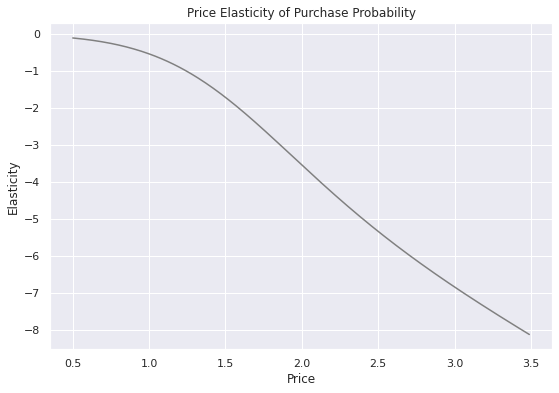

In [46]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

PURCHASE PROBABILITY

Segment 1 - Career Focused 

In [14]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [15]:
Y = df_pa_segment_1['Incidence']

In [16]:
X = pd.DataFrame()

In [17]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5

In [20]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model_incidence_segment_1.coef_

array([[-3.6365949]])

In [23]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purch_pr = Y_segment_1[:][:, 1]
pe = model_incidence_segment_1.coef_[:, 0] * price_range * (1-purchase_pr-segment_1)

NameError: ignored